# A Two-Step Approach to Solar Power Generation Prediction Based on Weather Data Using Machine Learning

In [1]:
# Basic Data Science Packages
import numpy as np
import pandas as pd

#ML scikit learn RFR and HyperParameter Tuner GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
  
#Plotting graph
import matplotlib.pyplot as plt

#Utility Module for computing and displaying metrics
from utility_functions import metrics

import warnings
warnings.filterwarnings("ignore")

# Import Data
- Along with extracting observed weather condition columns and forecast weather condition columns

In [2]:
thesis_dataset = pd.read_csv('data/final_thesis_dataset.csv',parse_dates=[0], index_col=0)

observed_values = ['SWTDN', 'SWGDN', 'T', 'v1', 'v2', 'v_50m', 'z0']
forecast_values = ['skyType', 'winddir', 'windspeed', 'humidity', 'temp', 'rho', 'p', 'dew', 'visibility', 'cloudcover']

### Collating a RandomForest Regressor for each observed attribute so that the extracted observation values be replaced with RFR predicted values

In [3]:
%%time
thesis_dataset = thesis_dataset.fillna(thesis_dataset.mean())
train = thesis_dataset[:6098] 
test = thesis_dataset[6098:] 

df = pd.DataFrame(columns=['Observed Weather Condition', 'R2'])

#Iterating through each observed variable and finding the best fit for applying RFR to 
#get best r2 score for synthetically derived observed value
for index, observed_value in enumerate(observed_values):
    param_grid = {  
        'bootstrap': [True], 
        'max_depth': [4, 5, 10, None], 
        'max_features': ['auto', 'log2'], 
        'n_estimators': [6, 7, 8, 9, 10, 11, 12, 13, 15]
    }

    rfr = RandomForestRegressor(random_state = 1)

    grid = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                              cv = 3, n_jobs = 1, verbose = 0)

    grid.fit(train[forecast_values], train[observed_value])
    
    test_pred = grid.predict(test[forecast_values])
    pred_observed = grid.predict(thesis_dataset[forecast_values])
    
    score = r2_score(test[observed_value], test_pred)
    df.loc[index] = [observed_value, score]
    
    #Replace the dataset with the synthetic values only if r2 > 70%
    if score > 0.7:
        thesis_dataset[observed_value] = pred_observed
df

Wall time: 1min 59s


,Observed Weather Condition,R2
0,SWTDN,0.160638
1,SWGDN,0.126945
2,T,0.950292
3,v1,0.612917
4,v2,0.594589
5,v_50m,0.519659
6,z0,-1.890561


- Fetch the first 70% records as train and rest as test
    - 8711 * 70% = 6098 records from the start (Train)
    - 8711 - 6098 = 2613 remaining records as (Test)

In [4]:
X_solar_train = train[['SWTDN', 'SWGDN', 'T','skyType', 'winddir', 'windspeed', 'humidity', 'temp', 'rho', 'p', 'dew', 'visibility', 'cloudcover']]
y_solar_train = train['DE_solar_generation_actual']
X_solar_test = test[['SWTDN', 'SWGDN', 'T','skyType', 'winddir', 'windspeed', 'humidity', 'temp', 'rho', 'p', 'dew', 'visibility', 'cloudcover']]
y_solar_test = test['DE_solar_generation_actual']

X_wind_train = train[['v1', 'v2', 'v_50m', 'z0','skyType', 'winddir', 'windspeed', 'humidity', 'temp', 'rho', 'p', 'dew', 'visibility', 'cloudcover']]
y_wind_train = train['DE_wind_generation_actual']
X_wind_test = test[['v1', 'v2', 'v_50m', 'z0','skyType', 'winddir', 'windspeed', 'humidity', 'temp', 'rho', 'p', 'dew', 'visibility', 'cloudcover']]
y_wind_test = test['DE_wind_generation_actual']

## Collating a dictionary of the suitable parameter value for the GridSearch to find optimal settings

In [5]:
param_grid = {  
    'bootstrap': [True], 
    'max_depth': [5, 10, None], 
    'max_features': ['auto', 'log2'], 
    'n_estimators': [5, 6, 10, 11, 15]
}

rfr = RandomForestRegressor(random_state = 1)

solar_grid = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 3, return_train_score=True)

solar_grid.fit(X_solar_train, y_solar_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=5 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=5, score=(train=0.974, test=0.888), total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=5 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=5, score=(train=0.974, test=0.951), total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=5 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=5, score=(train=0.968, test=0.961), total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=6 ..


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=6, score=(train=0.974, test=0.890), total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=6 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=6, score=(train=0.974, test=0.952), total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=6 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=6, score=(train=0.968, test=0.962), total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=10 .
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=10, score=(train=0.975, test=0.891), total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=10 .
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=10, score=(train=0.975, test=0.953), total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=10 .
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_es

[CV]  bootstrap=True, max_depth=10, max_features=log2, n_estimators=10, score=(train=0.988, test=0.851), total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=log2, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=log2, n_estimators=10, score=(train=0.990, test=0.936), total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=log2, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=log2, n_estimators=10, score=(train=0.987, test=0.942), total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=log2, n_estimators=11 
[CV]  bootstrap=True, max_depth=10, max_features=log2, n_estimators=11, score=(train=0.988, test=0.847), total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=log2, n_estimators=11 
[CV]  bootstrap=True, max_depth=10, max_features=log2, n_estimators=11, score=(train=0.990, test=0.935), total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=log2, n_estimators=11 
[CV]  bootstrap=True, max_depth=10, max_features=l

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    8.9s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 10, 11, 15]},
             return_train_score=True, verbose=3)

In [6]:
# print best parameter after tuning
print(solar_grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(solar_grid.best_estimator_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 15}
RandomForestRegressor(max_depth=5, n_estimators=15, random_state=1)


## Running predictions on the best model decided and Plotting them side by side

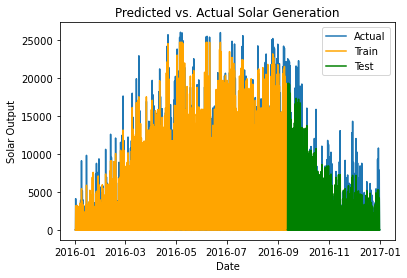

In [7]:
train_solar_pred = solar_grid.predict(X_solar_train)
test_solar_pred = solar_grid.predict(X_solar_test)

df = thesis_dataset[['DE_solar_generation_actual']]

train_df = train[['DE_solar_generation_actual']]
train_df.loc[:, 'DE_solar_generation_actual'] = train_solar_pred

test_df = test[['DE_solar_generation_actual']]
test_df.loc[:, 'DE_solar_generation_actual'] = test_solar_pred

# Plot all predictions
inversetransform, =plt.plot(df, label = 'Actual')
trainpredx, =plt.plot(train_df, color='orange', label = 'Train')
testpredx, =plt.plot(test_df, color='green', label = 'Test')
plt.xlabel('Date')
plt.ylabel('Solar Output')
plt.legend(loc="upper right")
plt.title("Predicted vs. Actual Solar Generation")
plt.show()

## Regression Metrics for Solar Data

In [8]:
metrics('rfr', test[['DE_solar_generation_actual']], test_solar_pred)

,MAE,MSE,RMSE,RMSLE,R2
model,,,,,
rfr,518.724614,1201.170098,34.657901,3.545526,0.913412


# Performing the same tuning for Wind Data

In [9]:
param_grid = {  
    'bootstrap': [True], 
    'max_depth': [5, 10, None], 
    'max_features': ['auto', 'log2'], 
    'n_estimators': [5, 6, 7, 8, 9, 10]
}

rfr = RandomForestRegressor(random_state = 1)

wind_grid = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 3, return_train_score=True)

wind_grid.fit(X_wind_train, y_wind_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=5 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=5, score=(train=0.931, test=0.884), total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=5 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=5, score=(train=0.955, test=0.898), total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=5 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=5, score=(train=0.951, test=0.886), total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=6 ..


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=6, score=(train=0.932, test=0.885), total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=6 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=6, score=(train=0.955, test=0.899), total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=6 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=6, score=(train=0.951, test=0.889), total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=7 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=7, score=(train=0.932, test=0.883), total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=7 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_estimators=7, score=(train=0.956, test=0.901), total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=auto, n_estimators=7 ..
[CV]  bootstrap=True, max_depth=5, max_features=auto, n_esti

[CV]  bootstrap=True, max_depth=10, max_features=auto, n_estimators=8, score=(train=0.988, test=0.868), total=   0.1s
[CV] bootstrap=True, max_depth=10, max_features=auto, n_estimators=9 .
[CV]  bootstrap=True, max_depth=10, max_features=auto, n_estimators=9, score=(train=0.977, test=0.885), total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, n_estimators=9 .
[CV]  bootstrap=True, max_depth=10, max_features=auto, n_estimators=9, score=(train=0.988, test=0.898), total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, n_estimators=9 .
[CV]  bootstrap=True, max_depth=10, max_features=auto, n_estimators=9, score=(train=0.988, test=0.869), total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto, n_estimators=10, score=(train=0.977, test=0.882), total=   0.2s
[CV] bootstrap=True, max_depth=10, max_features=auto, n_estimators=10 
[CV]  bootstrap=True, max_depth=10, max_features=auto,

[CV]  bootstrap=True, max_depth=None, max_features=log2, n_estimators=6, score=(train=0.994, test=0.869), total=   0.1s
[CV] bootstrap=True, max_depth=None, max_features=log2, n_estimators=6 
[CV]  bootstrap=True, max_depth=None, max_features=log2, n_estimators=6, score=(train=0.994, test=0.799), total=   0.1s
[CV] bootstrap=True, max_depth=None, max_features=log2, n_estimators=7 
[CV]  bootstrap=True, max_depth=None, max_features=log2, n_estimators=7, score=(train=0.989, test=0.849), total=   0.1s
[CV] bootstrap=True, max_depth=None, max_features=log2, n_estimators=7 
[CV]  bootstrap=True, max_depth=None, max_features=log2, n_estimators=7, score=(train=0.994, test=0.875), total=   0.1s
[CV] bootstrap=True, max_depth=None, max_features=log2, n_estimators=7 
[CV]  bootstrap=True, max_depth=None, max_features=log2, n_estimators=7, score=(train=0.994, test=0.812), total=   0.1s
[CV] bootstrap=True, max_depth=None, max_features=log2, n_estimators=8 
[CV]  bootstrap=True, max_depth=None, ma

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   10.1s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10]},
             return_train_score=True, verbose=3)

In [10]:
# print best parameter after tuning
print(wind_grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(wind_grid.best_estimator_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 9}
RandomForestRegressor(max_depth=5, n_estimators=9, random_state=1)


## Running predictions on the best model decided and Plotting them side by side

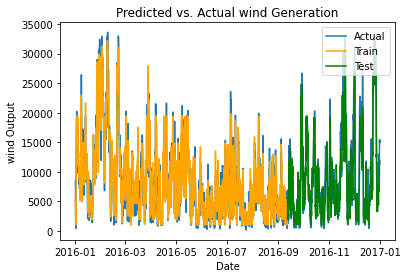

In [11]:
train_wind_pred = wind_grid.predict(X_wind_train)
test_wind_pred = wind_grid.predict(X_wind_test)

df = thesis_dataset[['DE_wind_generation_actual']]

train_df = train[['DE_wind_generation_actual']]
train_df.loc[:, 'DE_wind_generation_actual'] = train_wind_pred

test_df = test[['DE_wind_generation_actual']]
test_df.loc[:, 'DE_wind_generation_actual'] = test_wind_pred

# Plot all predictions
inversetransform, =plt.plot(df, label = 'Actual')
trainpredx, =plt.plot(train_df, color='orange', label = 'Train')
testpredx, =plt.plot(test_df, color='green', label = 'Test')
plt.xlabel('Date')
plt.ylabel('wind Output')
plt.legend(loc="upper right")
plt.title("Predicted vs. Actual wind Generation")
plt.show()

## Regression Metrics for Wind Data

In [12]:
metrics('rfr', test[['DE_wind_generation_actual']], test_wind_pred)

,MAE,MSE,RMSE,RMSLE,R2
model,,,,,
rfr,1748.421168,2433.214386,49.327623,3.898484,0.895874
